In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from pandas import get_dummies
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline

In [3]:
df=pd.read_csv('indian_liver_patient.csv')

# Create dummy or indicator features for categorical variables
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)
#dropping target column
df_dummies = df_dummies.drop(columns=['Dataset'])


# Check the new DataFrame with dummy variables
print(df_dummies.head())


   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Gender_Male  
0      3.3                        0.90        False  
1      3.2                        0.74

In [4]:
df_dummies

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,True
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,True
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,True
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,True
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,True


In [5]:
# Select numeric columns for scaling
numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numeric columns to scale them between 0 and 1
df_dummies[numeric_cols] = scaler.fit_transform(df_dummies[numeric_cols])

# Check the first few rows of the transformed data
print(df_dummies.head())

        Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302         0.004021          0.000000              0.060576   
1  0.674419         0.140751          0.275510              0.310699   
2  0.674419         0.092493          0.204082              0.208598   
3  0.627907         0.008043          0.015306              0.058134   
4  0.790698         0.046917          0.096939              0.064485   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.003015                    0.001626        0.594203   
1                  0.027136                    0.018296        0.695652   
2                  0.025126                    0.011791        0.623188   
3                  0.002010                    0.002033        0.594203   
4                  0.008543                    0.009961        0.666667   

    Albumin  Albumin_and_Globulin_Ratio  Gender_Male  
0  0.521739                       0.240        False  
1  0.5

In [6]:
#Split your data into testing and training datasets
from sklearn.model_selection import train_test_split

#  target variable is 'Dataset' and the rest are features
X = df_dummies 
y = df['Dataset'] 

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set features shape: {X_train.shape}')
print(f'Testing set features shape: {X_test.shape}')

Training set features shape: (466, 10)
Testing set features shape: (117, 10)


In [7]:
X_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
77,0.744186,0.002681,0.000000,0.760625,0.042714,0.023785,0.275362,0.260870,0.20,False
581,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.28,True
210,0.279070,0.005362,0.010204,0.062042,0.005025,0.000813,0.202899,0.326087,0.44,True
192,0.651163,0.025469,0.025510,0.102101,0.034673,0.008335,0.565217,0.565217,0.32,True
449,0.511628,0.006702,0.005102,0.053737,0.008040,0.003456,0.507246,0.478261,0.28,False
...,...,...,...,...,...,...,...,...,...,...
71,0.825581,0.005362,0.005102,0.061065,0.005025,0.003863,0.246377,0.195652,0.12,False
106,0.372093,0.065684,0.112245,0.040059,0.011055,0.016670,0.347826,0.369565,0.28,True
270,0.383721,0.004021,0.005102,0.084025,0.043216,0.008945,0.985507,0.869565,0.28,True
435,0.151163,0.001340,0.000000,0.069858,0.009045,0.002236,0.637681,0.782609,0.56,False


In [8]:
y_train

77     1
581    1
210    1
192    1
449    1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Dataset, Length: 466, dtype: int64

In [9]:
cat_cols = []
num_cols = []

for col in df.columns:
  if type(df[col][0]) == str:
    cat_cols.append(col)
  else:
    num_cols.append(col)

# Drop rows with NaN values from both X and y
X_train, y_train = X_train.dropna(), y_train[X_train.dropna().index]
X_test, y_test = X_test.dropna(), y_test[X_test.dropna().index]

<Axes: >

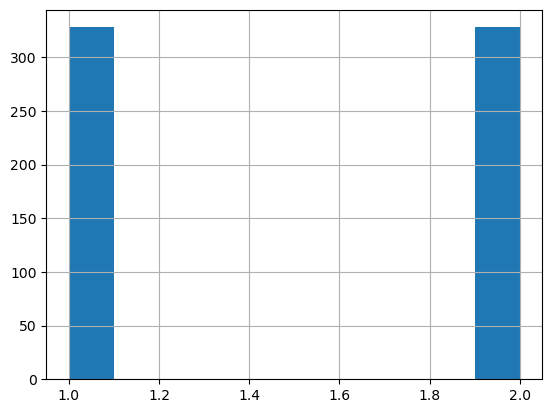

In [10]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.hist()

In [ ]:
#RANDOM FOREST MODEL

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7130434782608696

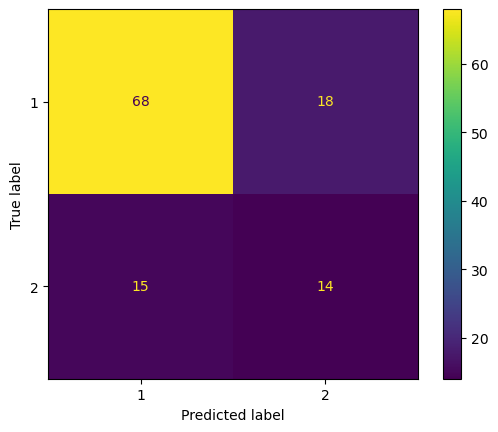

In [12]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [13]:
recall_score(y_test, y_pred)

0.7906976744186046

In [14]:
precision_score(y_test, y_pred)

0.8192771084337349

In [ ]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_resampled, y_train_resampled)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

In [ ]:
# Best hyperparameters are {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 200}
# Best score is: 0.7896471311074804

In [31]:
rf_optimized = model_grid.best_estimator_
y_pred = rf_optimized.predict(X_test)
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)

0.8333333333333334

In [ ]:
#logistic regression model

In [35]:
# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [37]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', tol=0.1))

In [39]:
# Create a parameter grid
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

In [41]:
grid_search = GridSearchCV(pipe, param_grid, cv=3)

In [43]:
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga',
                                                           tol=0.1))]),
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']})

In [45]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
Best Score: 0.9533333333333333


***Random forest Best score is: 0.7896471311074804 & Best hyperparameters are {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 200}***

***Logistic Regression Best Score: 0.9533333333333333 & Best Parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}***

The Logistic Regression model performs better with a significantly higher score. Therefore, Logistic Regression is the better model to choose based on these results.